In [70]:
import pandas as pd
import numpy as np
from datetime import datetime, date, time, timedelta, timezone
import dateutil.parser as parser
import missingno as msno

from src.preprocessing.preprocessing_functions import column_rename

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


import warnings
warnings.filterwarnings('ignore')

In [67]:
from matplotlib import pyplot as plt
# Set the figure size
plt.rcParams["figure.figsize"] = [15, 3.50]
plt.rcParams["figure.autolayout"] = True

sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': 'white', 'grid.color': '.8'}
)
NF_ORANGE = '#ff5a36'
NF_BLUE = '#163251'
cmaps_hex = ['#193251','#FF5A36','#696969', '#7589A2','#FF5A36', '#DB6668']
sns.set_palette(palette=cmaps_hex)
sns_c = sns.color_palette(palette=cmaps_hex)
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

In [18]:
#load data from pickles
df_sugarbeet = pd.read_pickle('pickles/01_df_sugarbeet.pkl')
df_weatherstations = pd.read_pickle('pickles/01_df_weatherstations.pkl')
df_locations = pd.read_pickle('pickles/01_df_locations.pkl')
df_openweather = pd.read_pickle('pickles/01_df_openweather.pkl')
df_openweather_2021 = pd.read_pickle('pickles/01_df_openweather_2021.pkl')

### EDA

##### missing values

<AxesSubplot:>

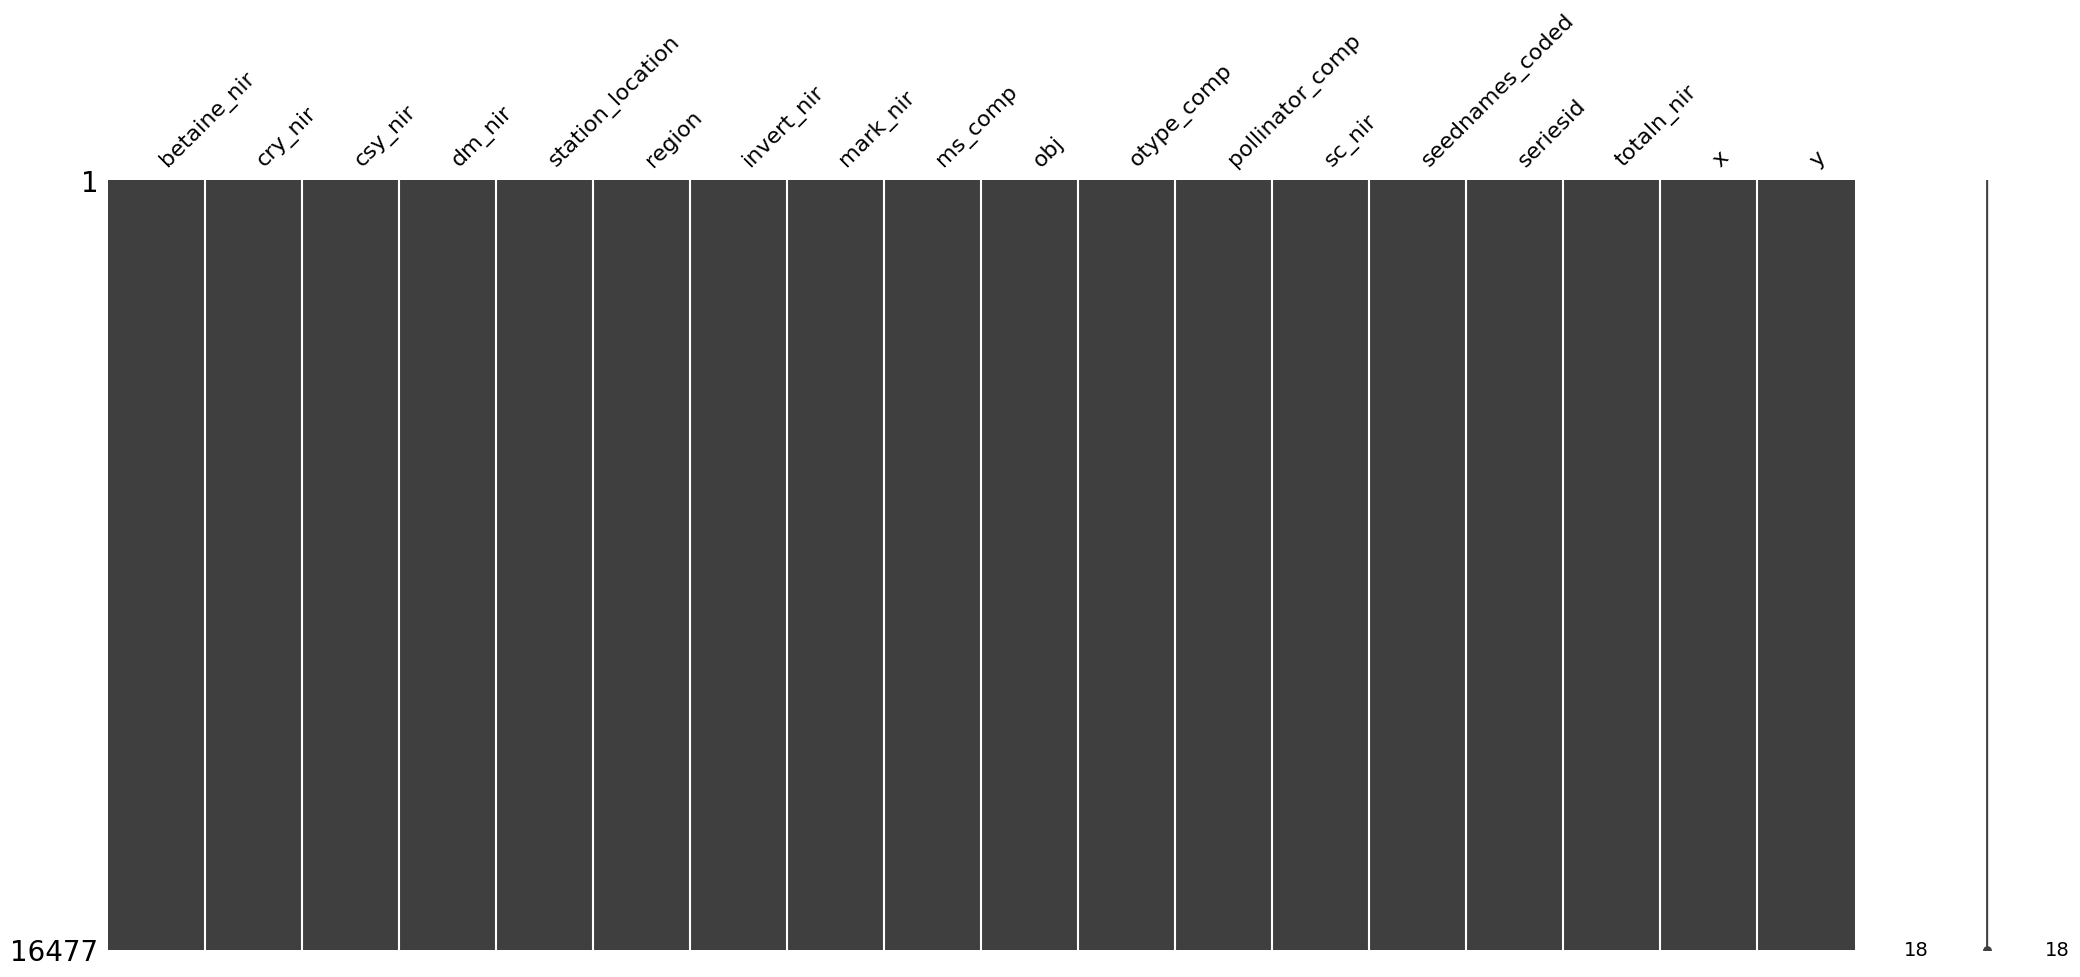

In [19]:
msno.matrix(df_sugarbeet)

<AxesSubplot:>

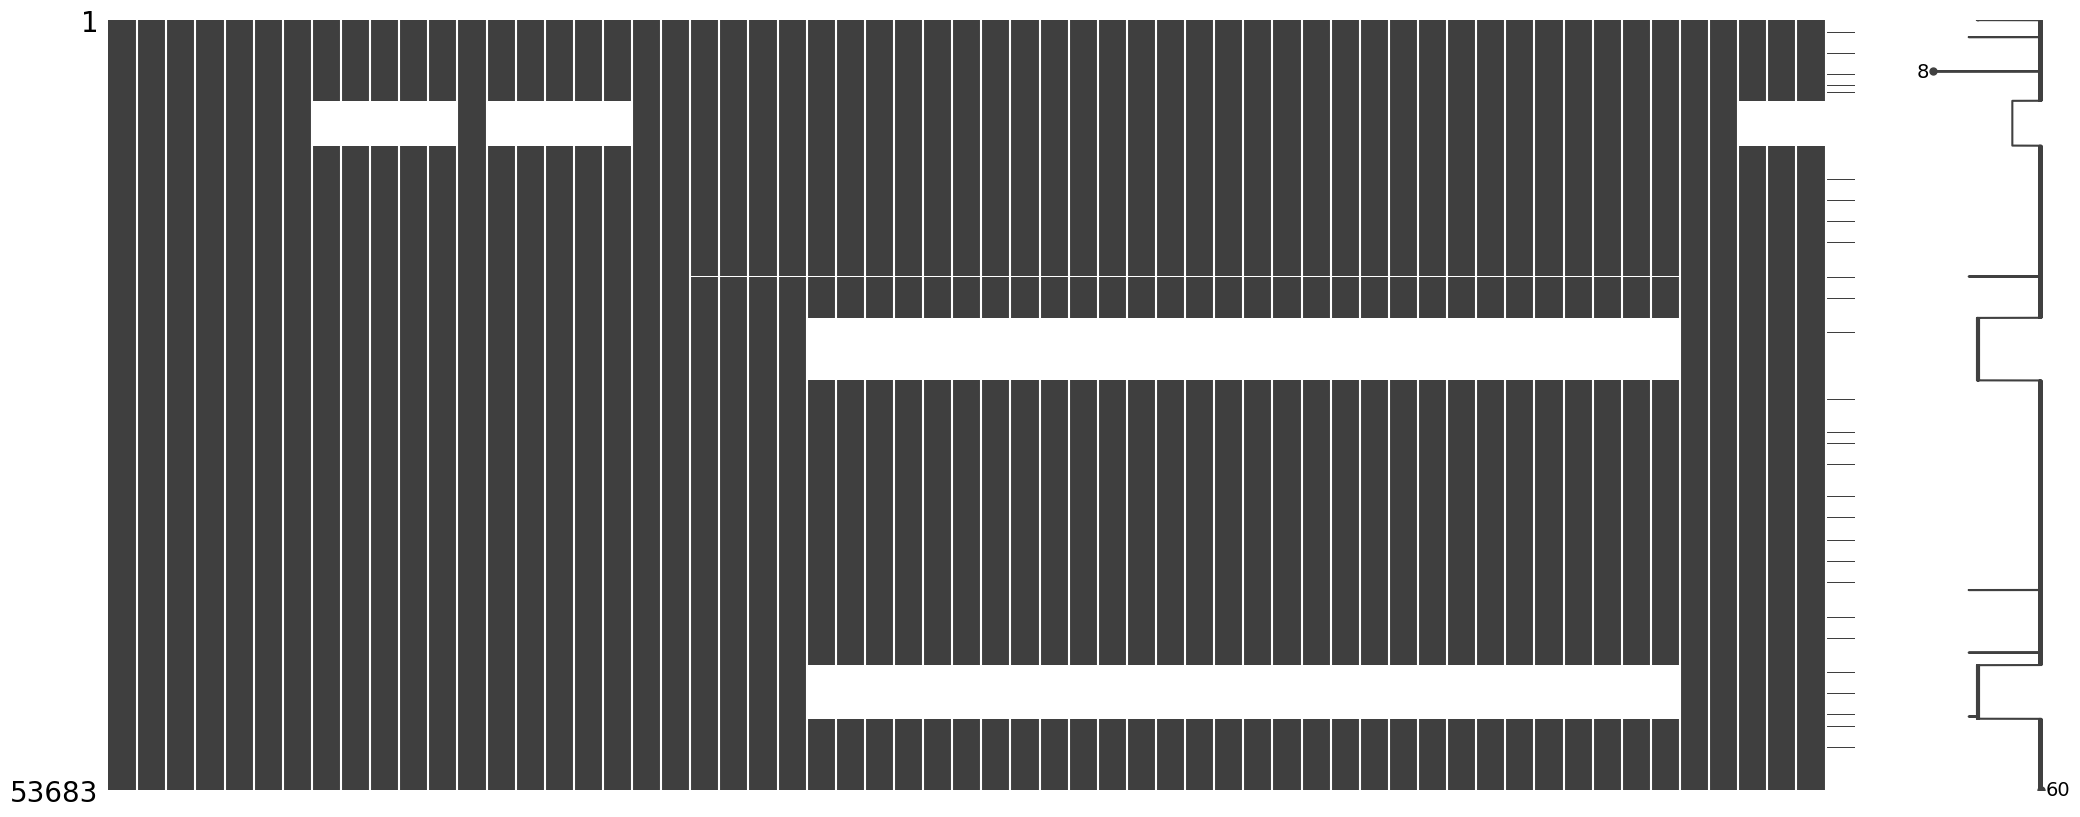

In [20]:
msno.matrix(df_weatherstations)

<AxesSubplot:>

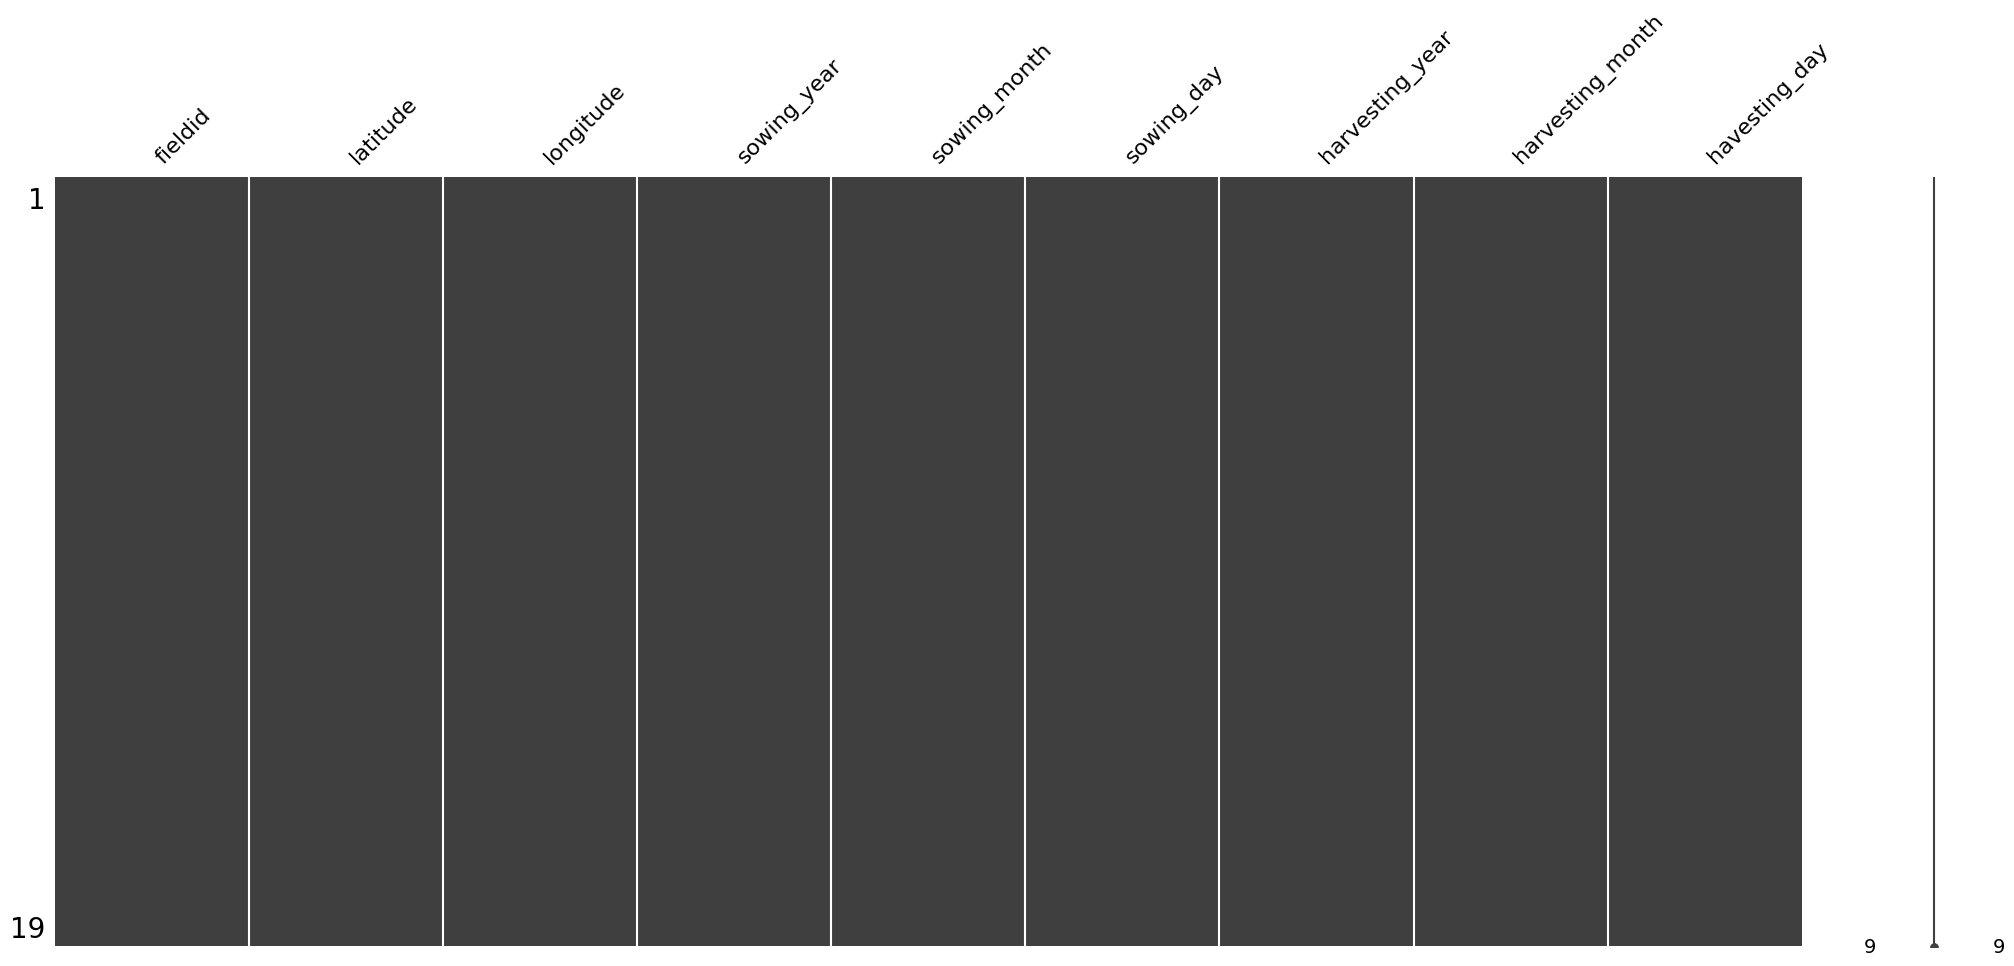

In [21]:
msno.matrix(df_locations)

<AxesSubplot:>

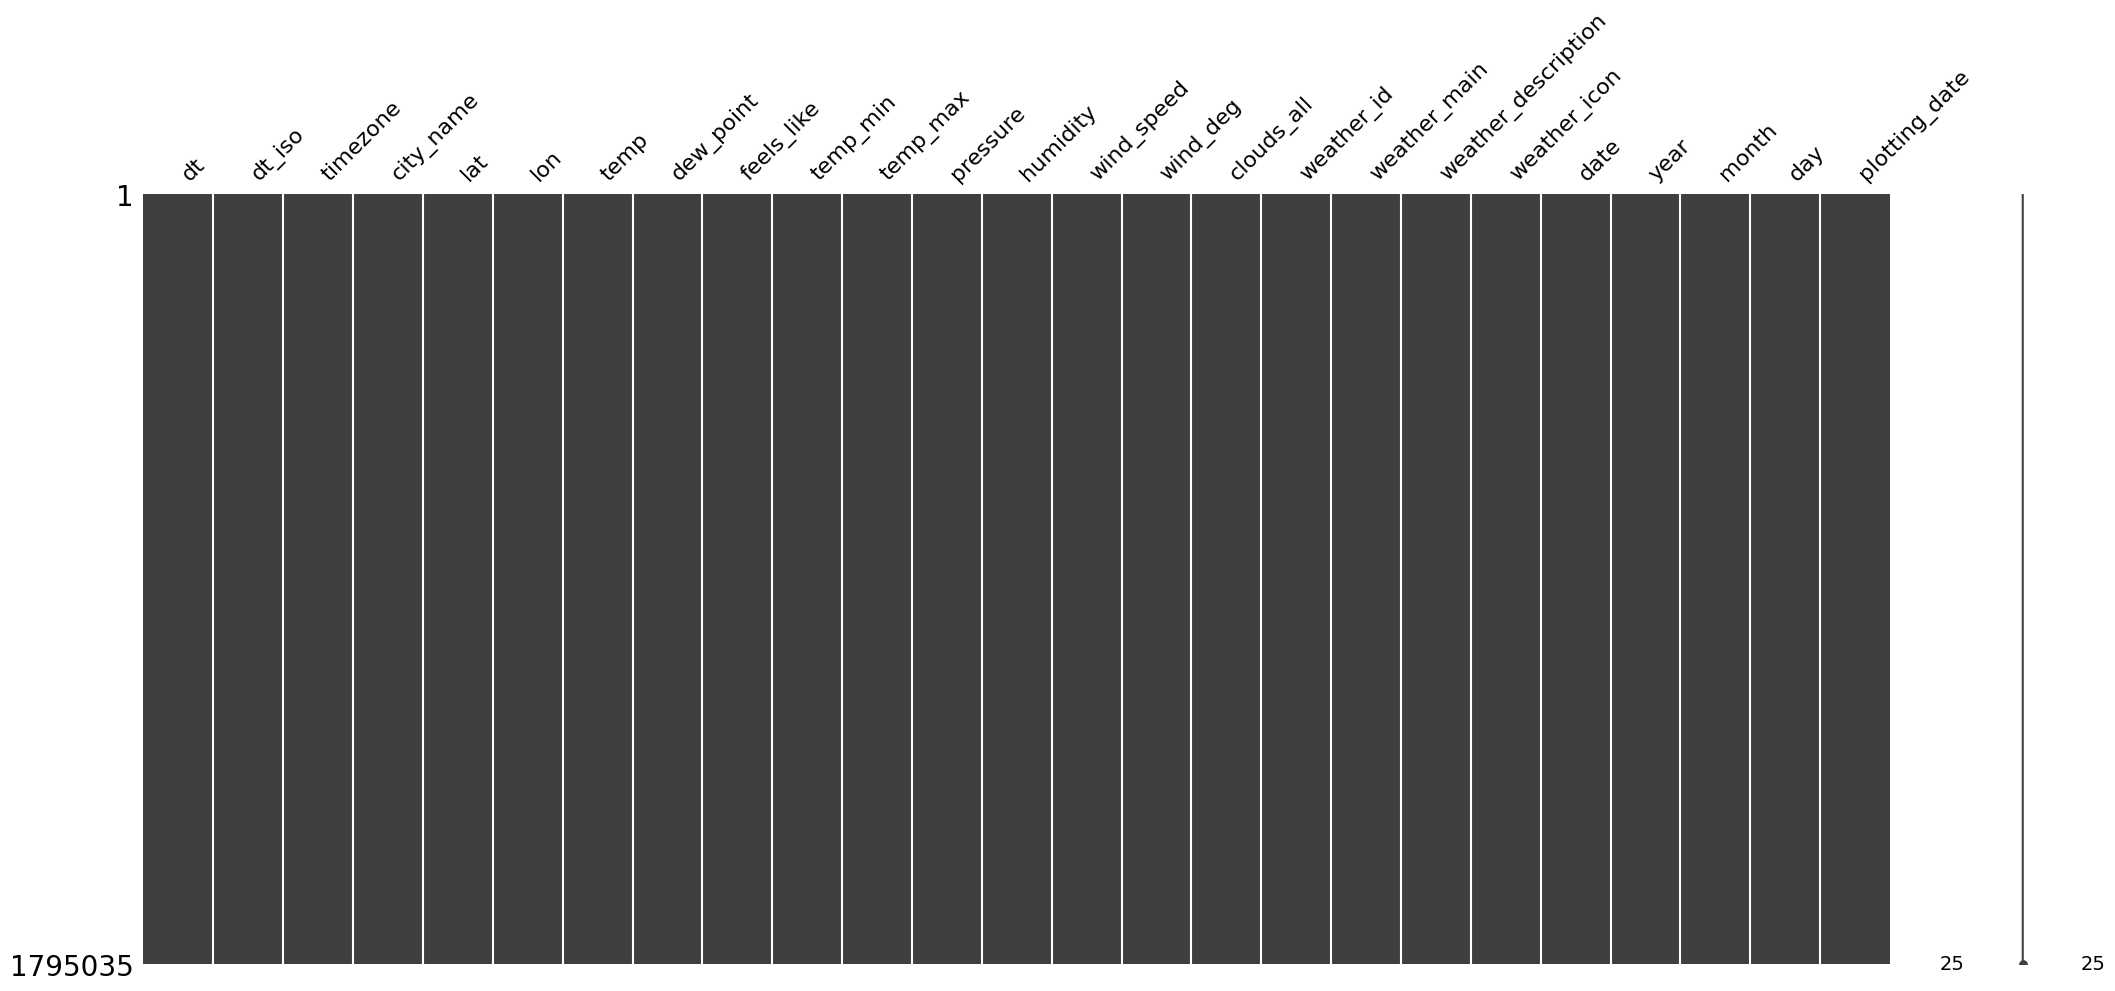

In [22]:
msno.matrix(df_openweather)

<AxesSubplot:>

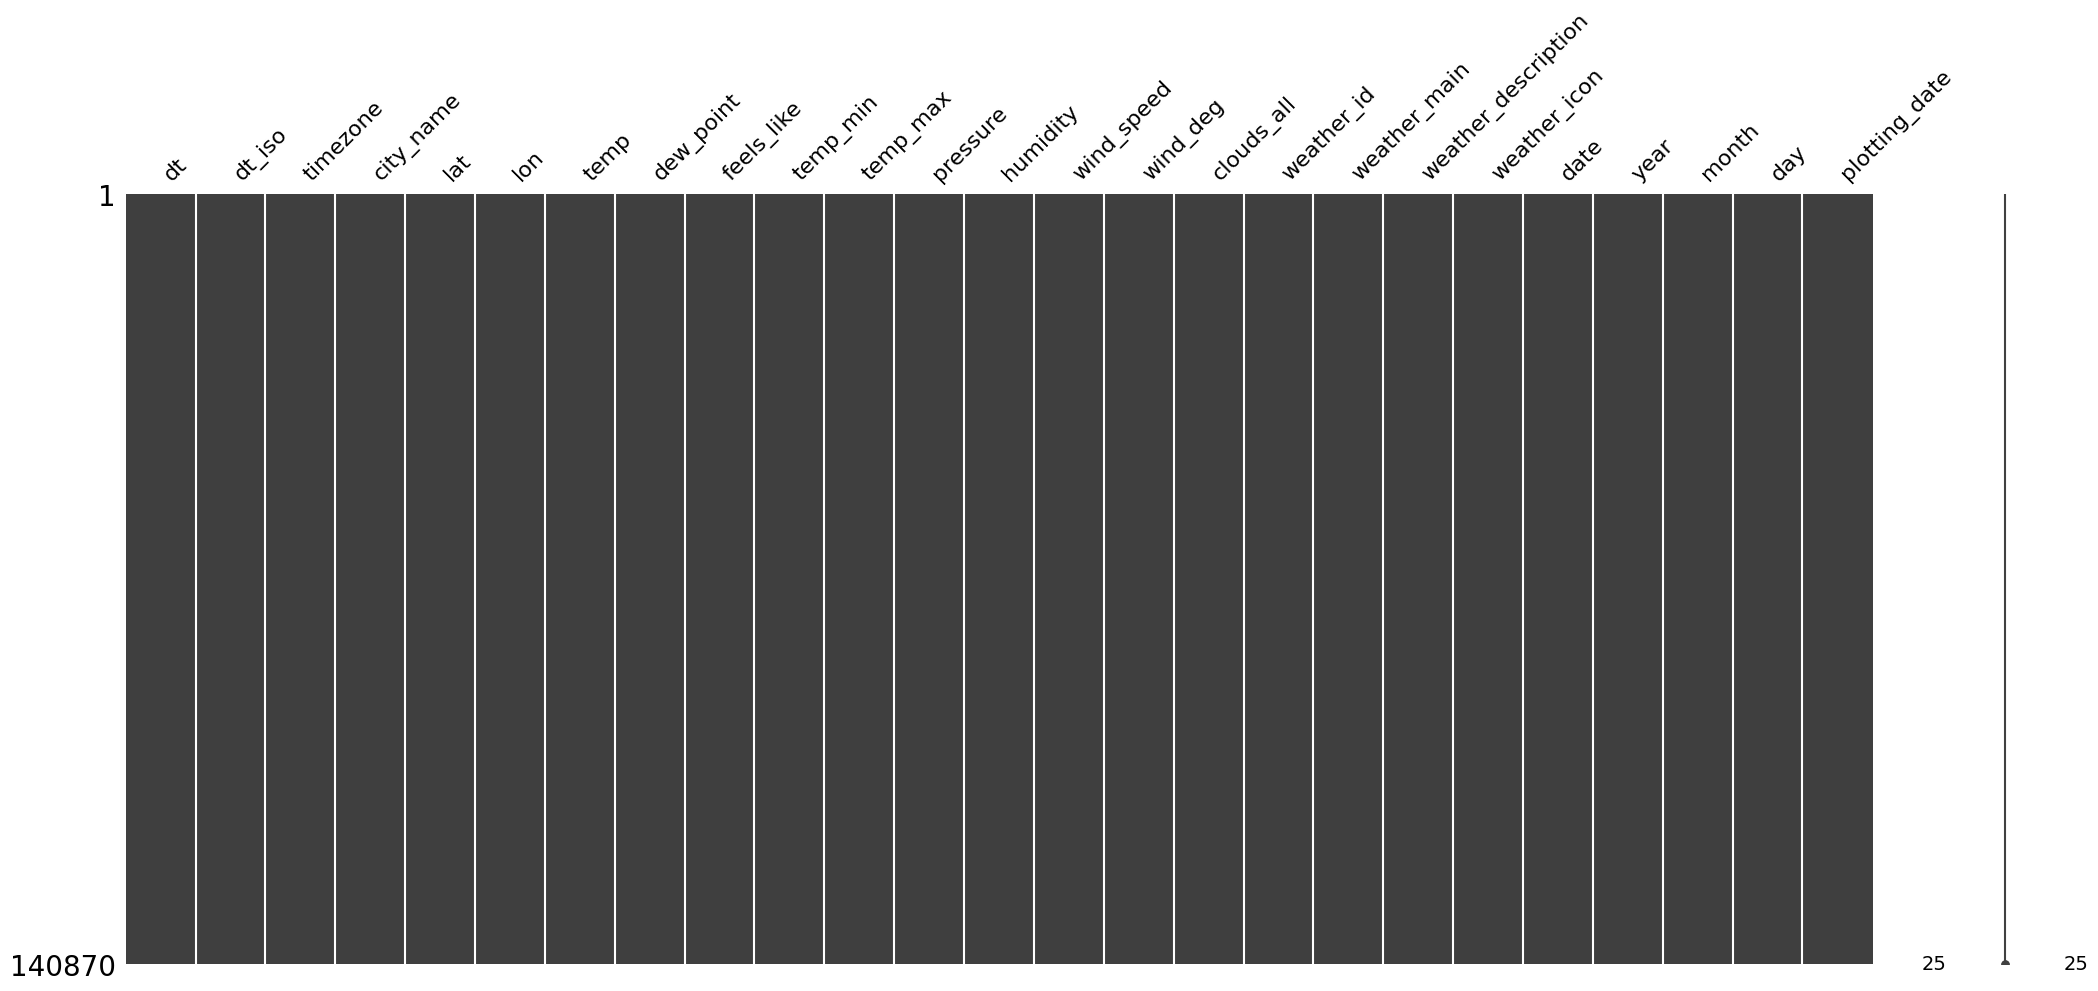

In [23]:
msno.matrix(df_openweather_2021)

### Data Visualisation

#### Field weather stations

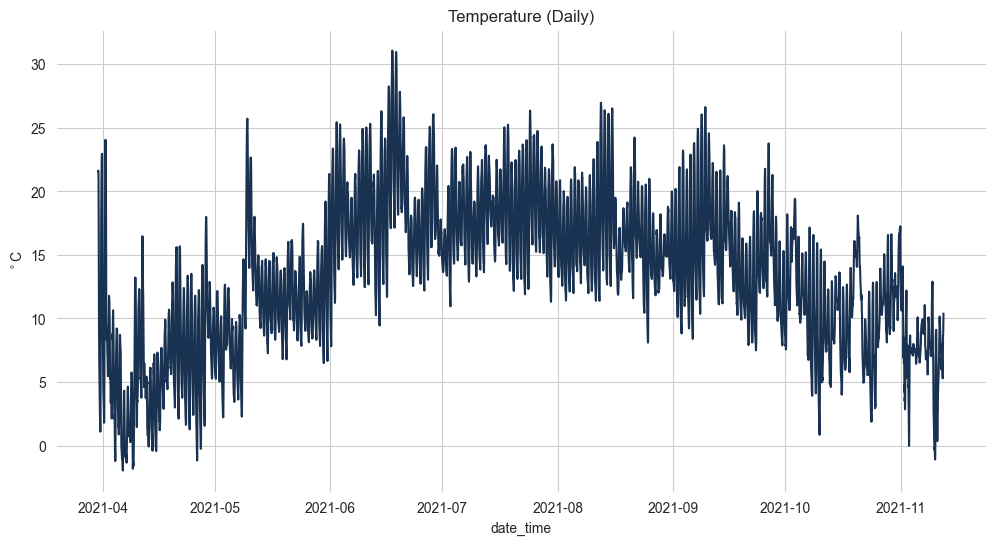

In [32]:
df_weatherstations['plotting_date'] = df_weatherstations['date_time'].dt.dayofyear
# Aggregate temperature by day
daily_data_df = df_weatherstations \
    .groupby(['date_time', 'month', 'day', 'plotting_date'], as_index=False)\
    .agg({'air_temperature_avg': np.mean}) \
    .set_index('date_time')
# Plot temperature on daily basis 
fig, ax = plt.subplots()
sns.lineplot(x='date_time', y='air_temperature_avg', data=daily_data_df.reset_index(), ax=ax)
ax.set(title='Temperature (Daily)', ylabel=r'$^\circ$C');


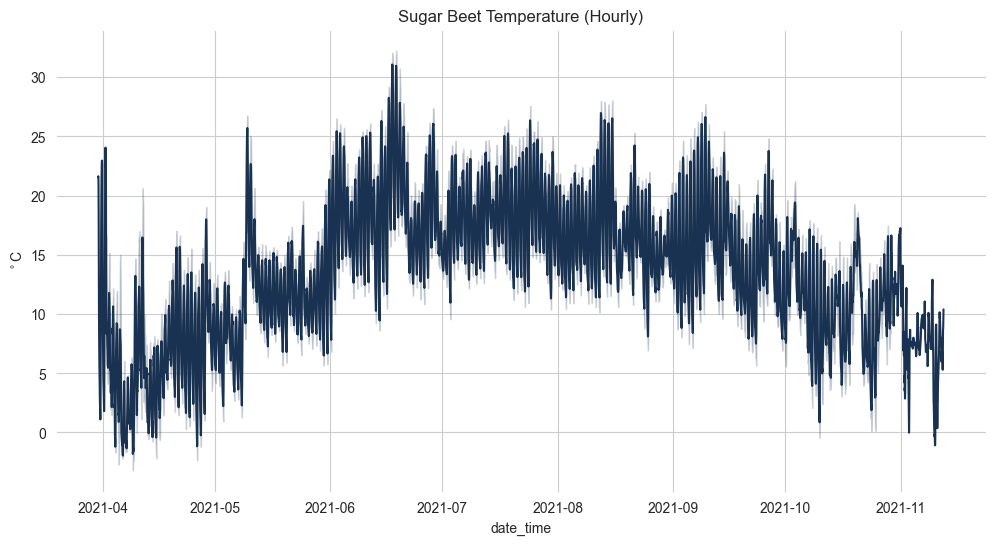

In [37]:
# Temperature hourly development over time 
fig, ax = plt.subplots()
sns.lineplot(x='date_time', y='air_temperature_avg', data=df_weatherstations, ax=ax)
ax.set(title='Sugar Beet Temperature (Hourly)', ylabel=r'$^\circ$C');


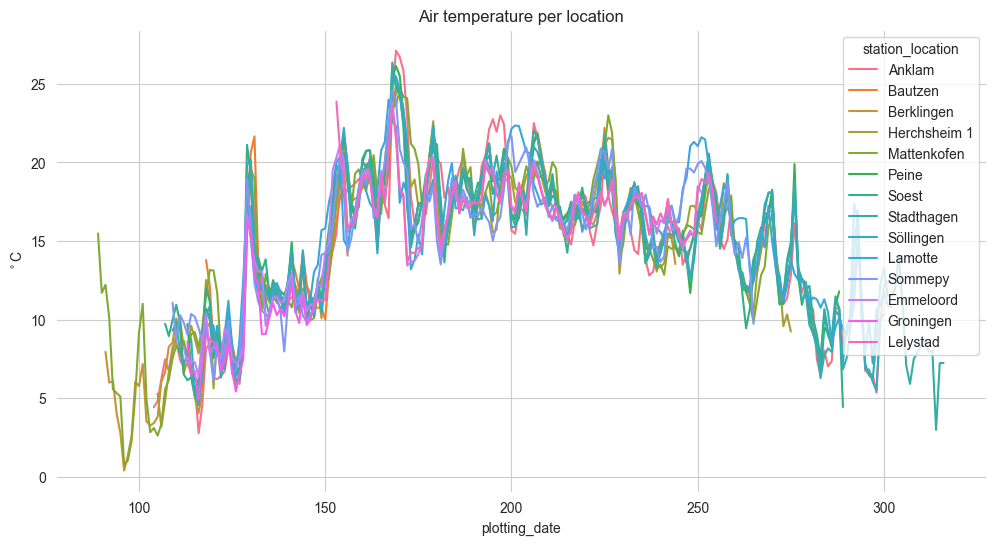

In [55]:
df_grouped = df_weatherstations.groupby(['country', 'station_location', 'month', 'day']).mean()

fig, ax = plt.subplots()
sns.lineplot(data=df_grouped, x = 'plotting_date', y = 'air_temperature_avg', hue = 'station_location')
ax.set(title='Air temperature per location', ylabel=r'$^\circ$C');


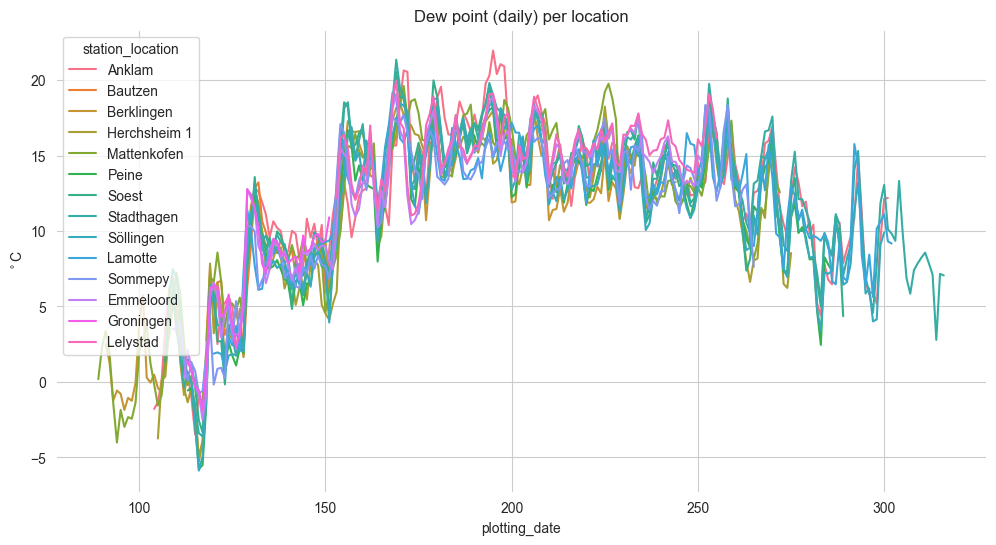

In [56]:
fig, ax = plt.subplots()
sns.lineplot(data=df_grouped, x = 'plotting_date', y = 'dew_point_avg', hue = 'station_location')
ax.set(title='Dew point (daily) per location', ylabel=r'$^\circ$C');


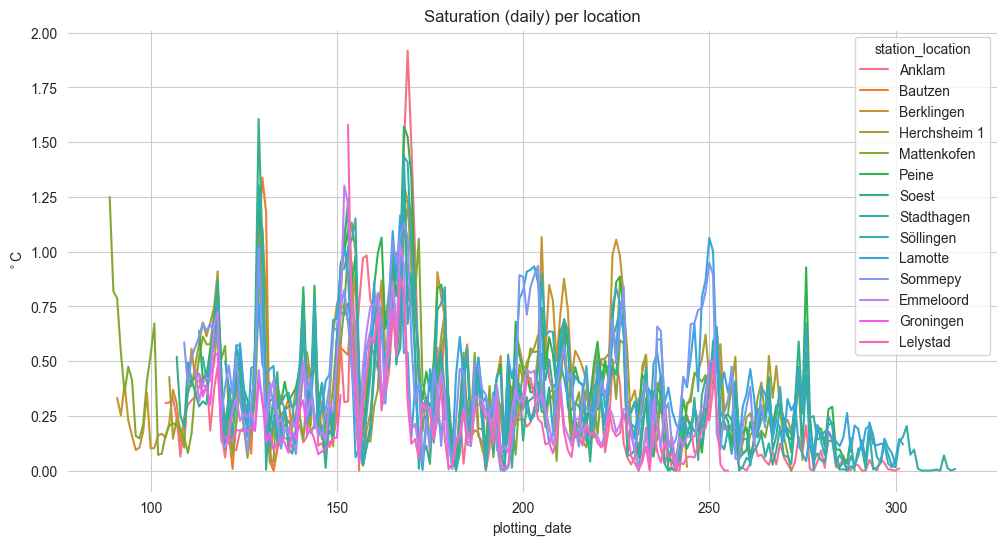

In [57]:
fig, ax = plt.subplots()
sns.lineplot(data=df_grouped, x = 'plotting_date', y = 'saturation_vpd_avg', hue = 'station_location')
ax.set(title='Saturation (daily) per location', ylabel=r'$^\circ$C');


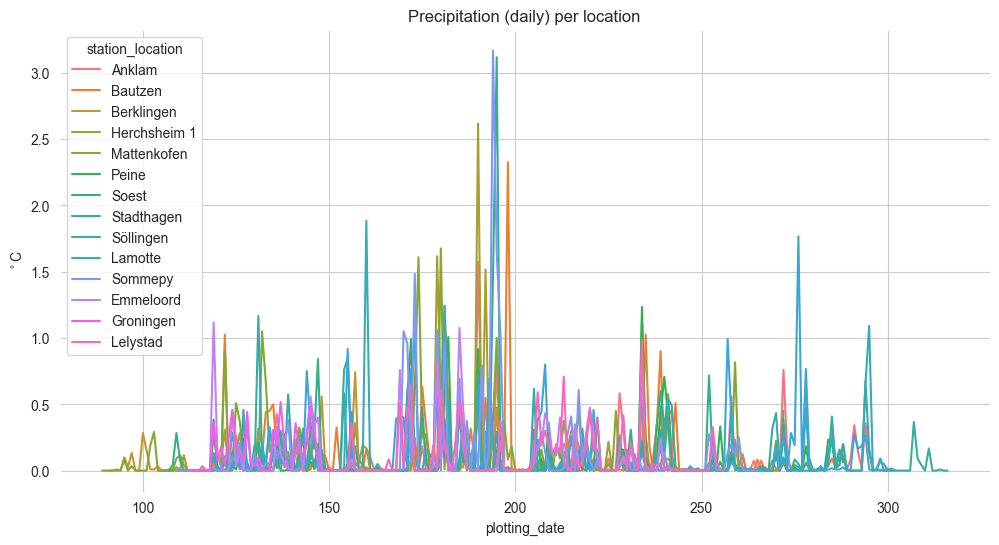

In [58]:
fig, ax = plt.subplots()
sns.lineplot(data=df_grouped, x = 'plotting_date', y = 'precipitation', hue = 'station_location')
ax.set(title='Precipitation (daily) per location', ylabel=r'$^\circ$C');



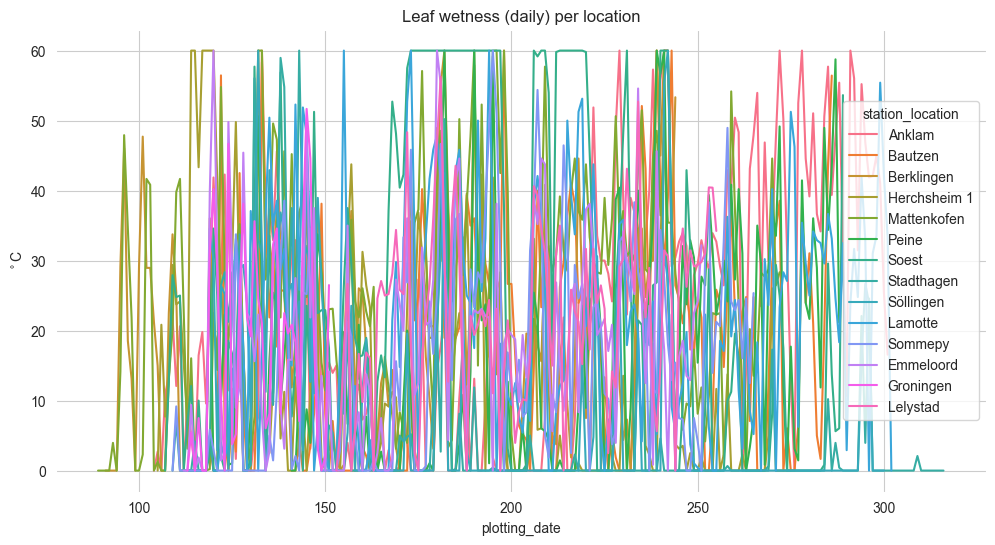

In [59]:
fig, ax = plt.subplots()

sns.lineplot(data=df_grouped, x = 'plotting_date', y = 'leaf_wetness', hue = 'station_location')
ax.set(title='Leaf wetness (daily) per location', ylabel=r'$^\circ$C');


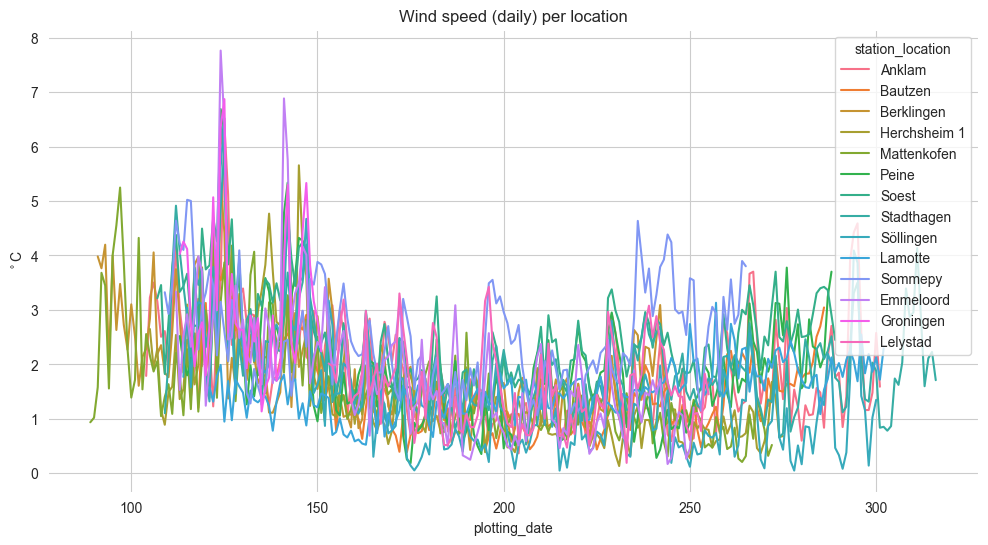

In [60]:
fig, ax = plt.subplots()
sns.lineplot(data=df_grouped, x = 'plotting_date', y = 'wind_speed_avg', hue = 'station_location')
ax.set(title='Wind speed (daily) per location', ylabel=r'$^\circ$C');


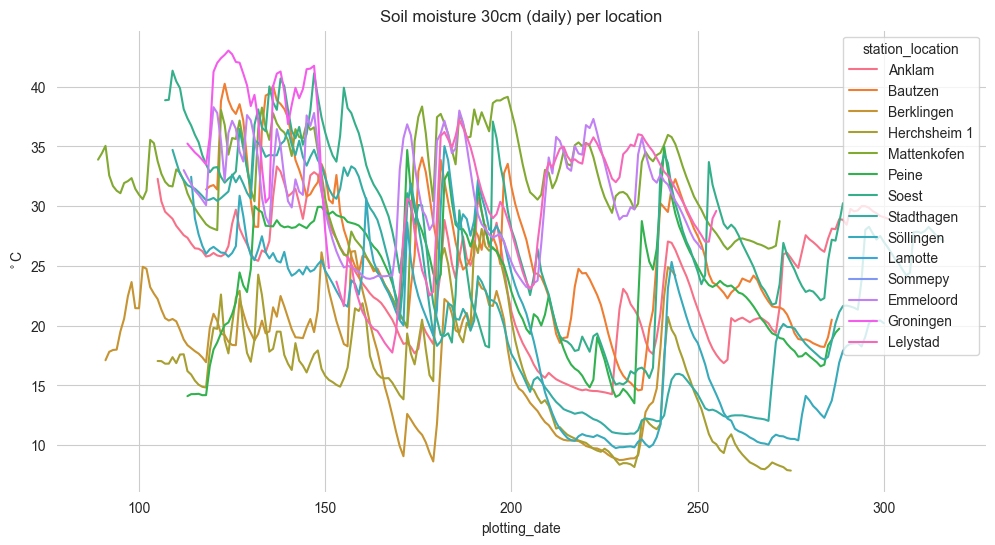

In [61]:
fig, ax = plt.subplots()
sns.lineplot(data=df_grouped, x = 'plotting_date', y = 'eag_soil_moisture_1', hue = 'station_location')
ax.set(title='Soil moisture 30cm (daily) per location', ylabel=r'$^\circ$C');


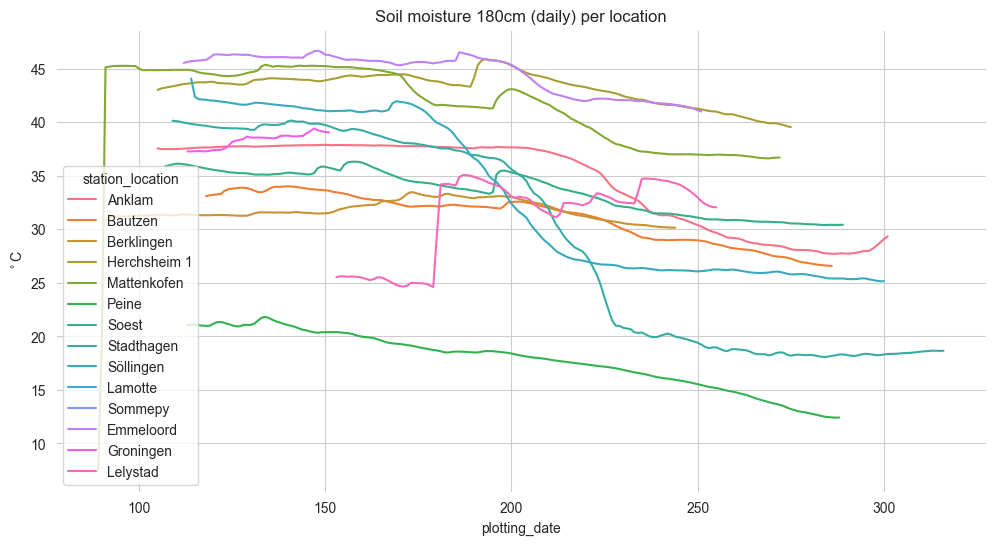

In [62]:
fig, ax = plt.subplots()
sns.lineplot(data=df_grouped, x = 'plotting_date', y = 'eag_soil_moisture_6', hue = 'station_location')
ax.set(title='Soil moisture 180cm (daily) per location', ylabel=r'$^\circ$C');


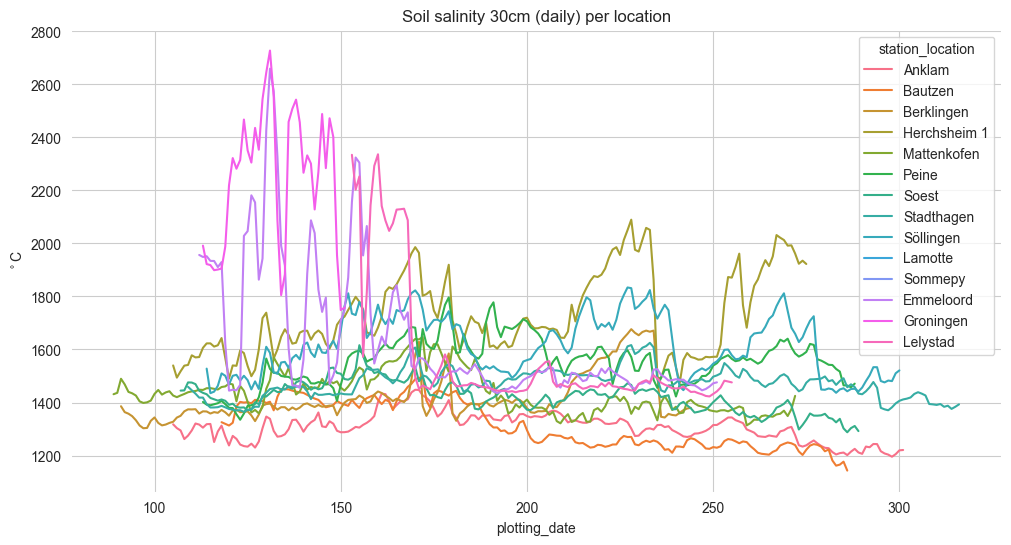

In [63]:
fig, ax = plt.subplots()
sns.lineplot(data=df_grouped, x = 'plotting_date', y = 'soil_salinity_1', hue = 'station_location')
ax.set(title='Soil salinity 30cm (daily) per location', ylabel=r'$^\circ$C');


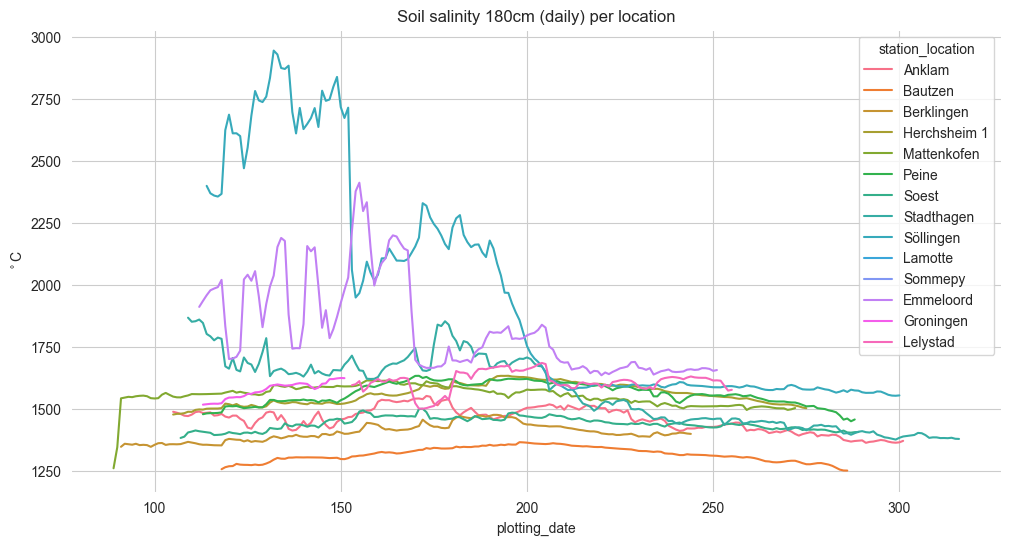

In [64]:
fig, ax = plt.subplots()

sns.lineplot(data=df_grouped, x = 'plotting_date', y = 'soil_salinity_6', hue = 'station_location')
ax.set(title='Soil salinity 180cm (daily) per location', ylabel=r'$^\circ$C');


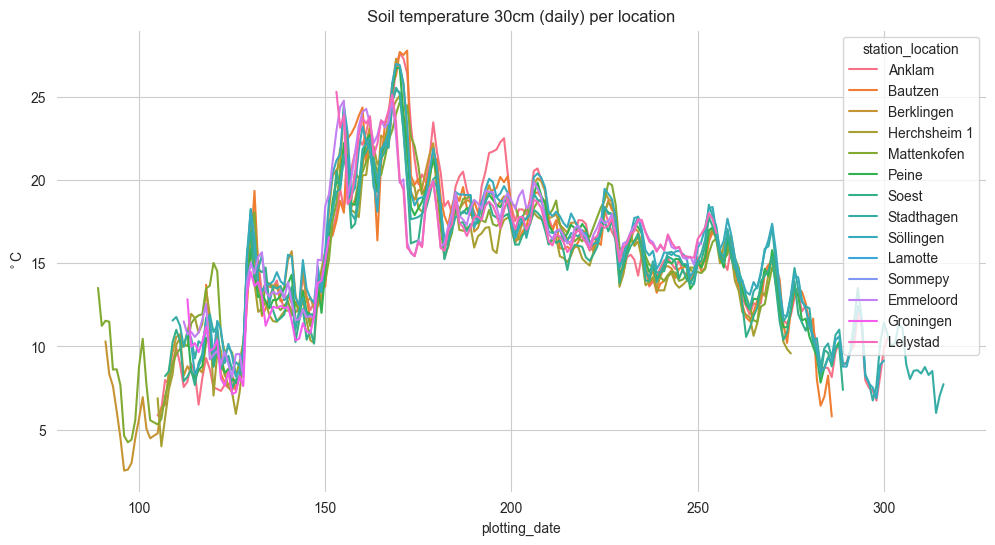

In [65]:
fig, ax = plt.subplots()
sns.lineplot(data=df_grouped, x = 'plotting_date', y = 'soil_temperature_1_vg', hue = 'station_location')
ax.set(title='Soil temperature 30cm (daily) per location', ylabel=r'$^\circ$C');


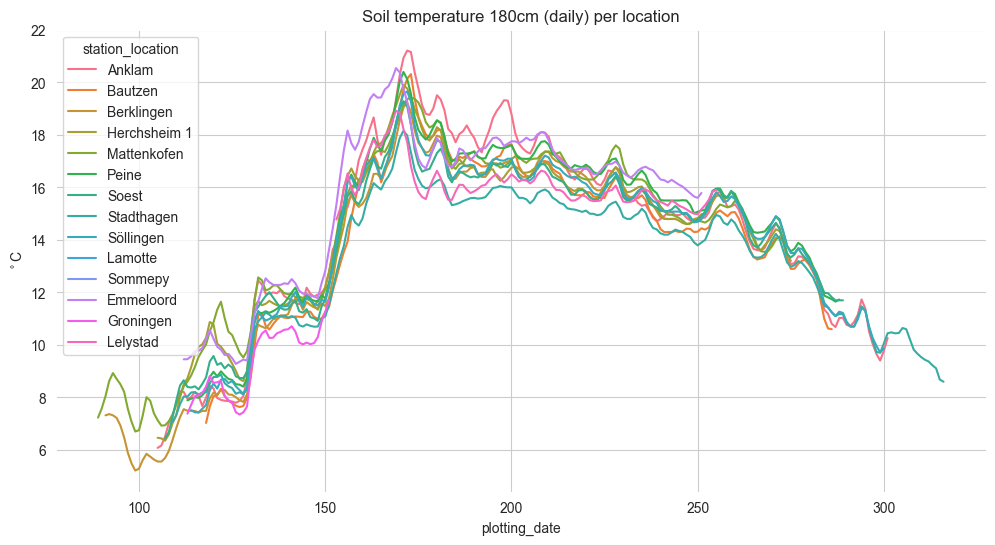

In [66]:
fig, ax = plt.subplots()
sns.lineplot(data=df_grouped, x = 'plotting_date', y = 'soil_temperature_6_vg', hue = 'station_location')
ax.set(title='Soil temperature 180cm (daily) per location', ylabel=r'$^\circ$C');


#### Sugarbeet data

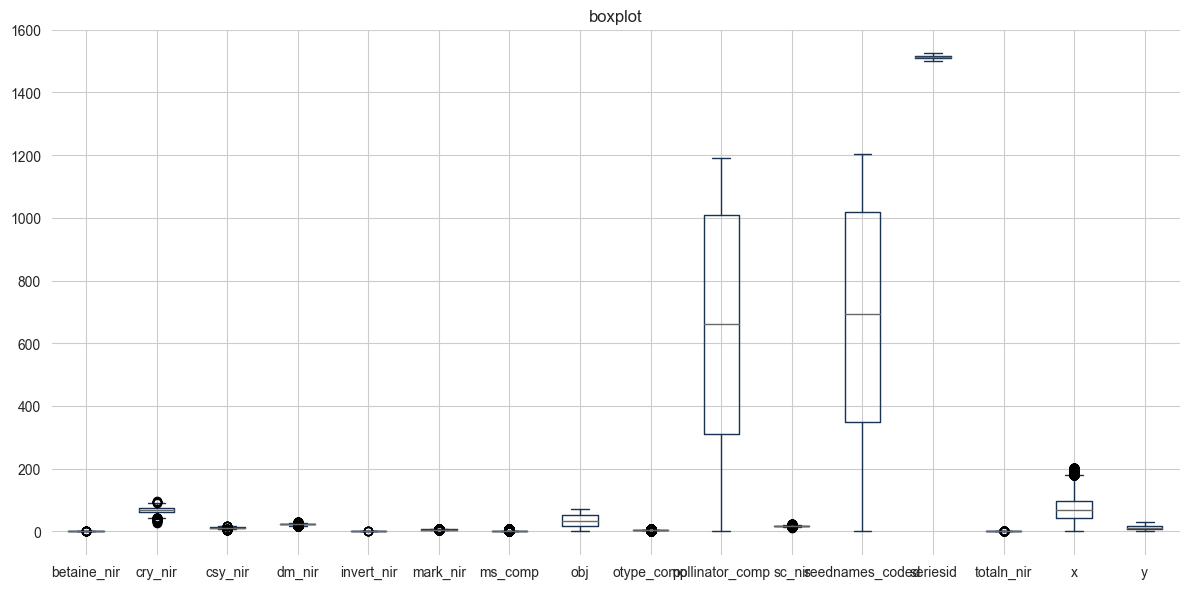

In [68]:
# Pandas dataframe
data = df_sugarbeet
# Plot the dataframe
ax = data.plot(kind='box', title='boxplot')
# Display the plot
plt.show()

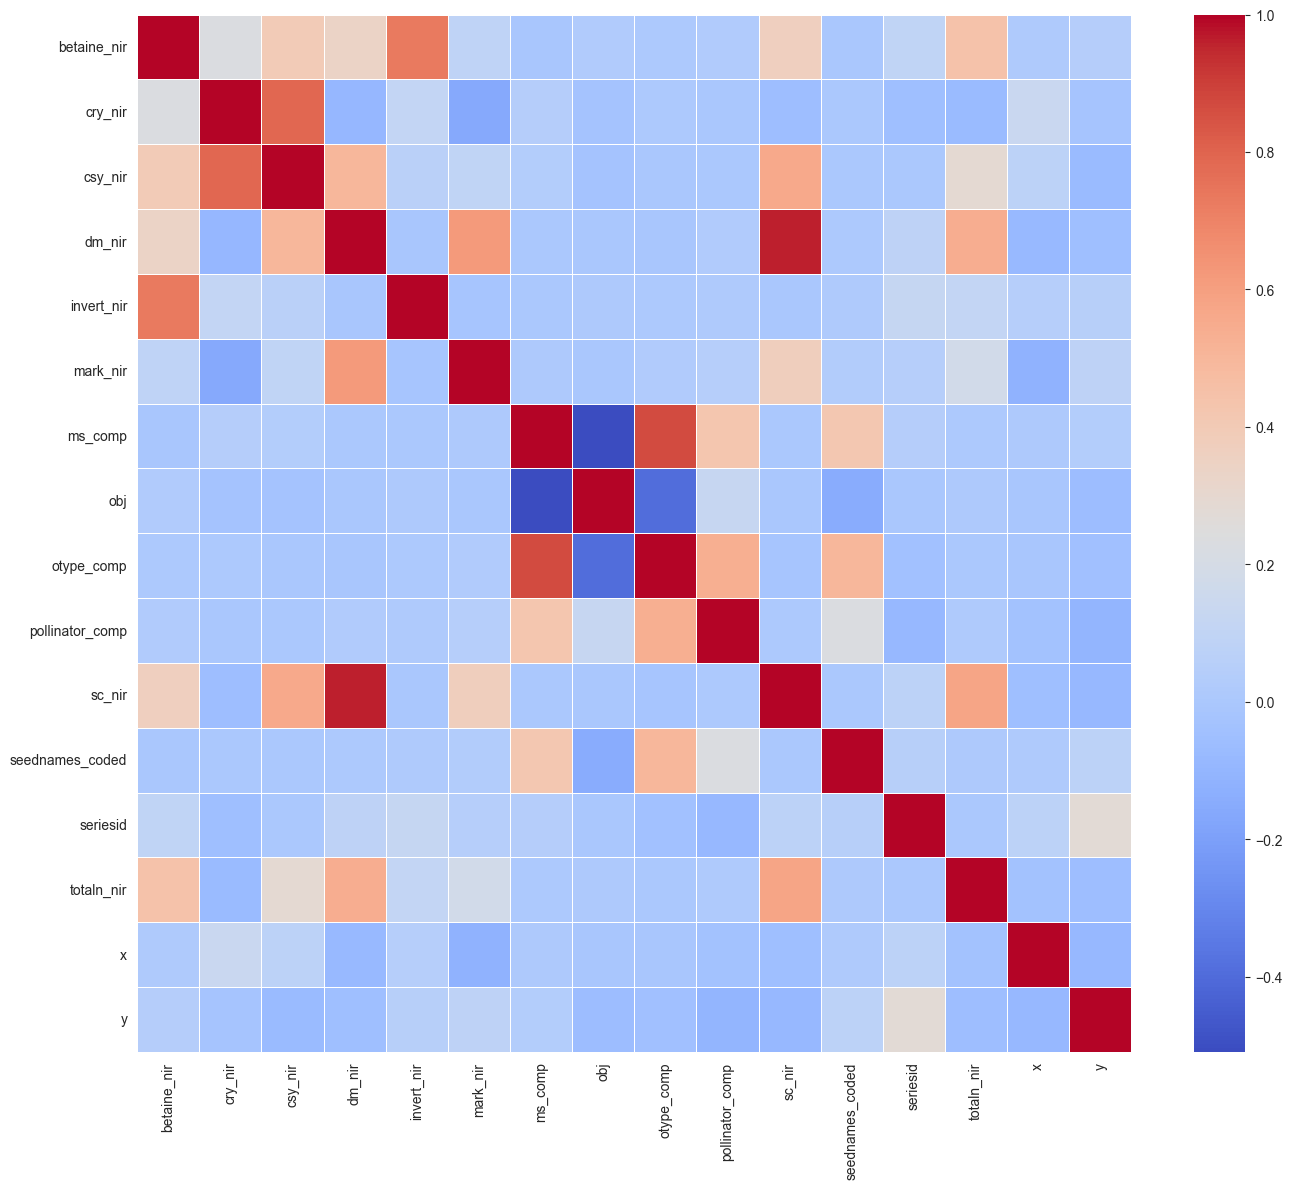

In [72]:
# correlation matrix between these variables
corr_mtrx=df_sugarbeet.corr()
corr_mtrx
# draw the heatmap 
plt.figure(figsize = (14,12))
ax = sns.heatmap(corr_mtrx, linewidths=.5, annot=False, cmap='coolwarm')

#### Field locations

In [71]:
# use plotly mapbox to map the houses within her price range & preferred area

fig = px.scatter_mapbox(df_locations, lat='latitude', lon='longitude', color='fieldid', title='Fieldlocations', color_continuous_scale=px.colors.sequential.Bluered, hover_name='fieldid')
fig.update_layout( mapbox_style='open-street-map', title_x=0.5, legend_title_text='fieldid')
#fig.update_mapboxes(zoom=10.5, center_lat=47.6062, center_lon=-122.3321)
fig.show()
